# Classification of plant species using leaf pictures and CNN 

## Abstract:
 There are over half a million plant species in the globe, thus classifying and identifying different plant species is a crucial process. Recently, computer vision has been effectively applied to automated plant categorizing systems. Manual identification needs previous knowledge of species and is a time-consuming operation, thus the atomization approach helps to speed up the traditional way of plant leaf identification. Plants can be grouped and identified according to their reproductive system (flowers) and leaf shape. The suggested proposal aims to include atomization into the process of developing a model that can recognize plant leaf species using a digital picture of a plant leaf. 
 
 Convolutional neural networks are one of the most widely used deep learning techniques for plant leaf classification. The Neural Network would be taught to recognize edges (shape-based classification). The LeafSnap dataset provided a huge number of training samples. Optimizing hyper parameters during training resulted in an accurate rate of around 85% for leaf classification using deep learning's CNN toolkit. CNN applications serve as a benchmark for image processing in botany by enhancing the accuracy of picture classification and recognition. This will aid botanical researchers with their research and speed up the process of identifying plant species. 


# Project Background

## What is CNN and what can it do?
   CNN stands for Convolutional Neural Network. It is a type of deep learning algorithm that is primarily used for analyzing visual imagery, they are widely used in computer vision tasks such as image classification, object detection, segmentation, and recognition. CNN is a deep  neural network that learns to categorize images or predict the likelihood of each category of an input by taking the input and recognizing the relevant components in the image. For example, it can learn to distinguish an image of a panda and a bear by learning the features like eyes, ears, mouth of panda and bear separately and will be able to predict whether an out-of-the-training image is a panda or a bear.

## Data introduction:

 The image dataset comes from the 'leafsnap' project dataset in kaggle, which seeks to detect leaves using an iOS app. The collection includes both field and laboratory photos. Field photographs are shot outside in nature, whereas lab images are captured and produced within a photo studio. There is also a subgroup of segmented pictures in both groups, with the form of the leaves in white fill and the remainder of the image in black fill. Both pictures are utilized to assess accuracy, and the findings show that field photos benefit from greater image augmentation while segmentation images do not benefit from image augmentation. Each image is 800*700 in size but has been compressed to 256 * 256 to make it easier for our CNN to process.


## Solution approach:
1. The number of input pictures accessible for each species varies, with an average of only a hundred for each. This is a special issue for a CNN. So, a CNN model for 50 species is developed and evaluated to ensure accuracy and time complexity. This is done using both segmented lab and field photos.
2. VGGNet, a notable convolutional network base, which is also used to assess accuracy.
3. This project uses 'TensorFlow', a famous deep learning framework, to simulate the CNN.
4. Image augmentation, batch normalization, and regularization are used to test for accuracy improvements, and the best model's accuracy is provided.


# First CNN Model using Lab images 

### Importing the required packages

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.losses import CategoricalCrossentropy

### Loading the images from the local directory

Initial network is created for classifying 10 species and observe the accuracy to improve the network because the input images available are less for CNN. The images that are modified in lab are used in this network

In [3]:
# This data frame consists of image names and the label that is required for 
# creating training images and testing images
df = pd.read_csv('LeafSpan\leafsnap-dataset\leafsnap-dataset-images.txt', sep='\t')
df['image_name'] = df[df.source == 'lab'].drop(['file_id','source','segmented_path'], axis=1)['image_path'].str[-15:]
df = df[df.source == 'lab'][['image_name', 'species']]
species = df.species.unique()
# firstly we start with classifying 10 species.
species[:10]

array(['Abies concolor', 'Abies nordmanniana', 'Acer campestre',
       'Acer ginnala', 'Acer griseum', 'Acer palmatum',
       'Acer platanoides', 'Acer pseudoplatanus', 'Acer rubrum',
       'Acer saccharinum'], dtype=object)

The dataframe consisting of all the image names and labels, is split into testing and train of ratio 0.2. 20 percent of images are used for testing.

In [33]:
"""Dataframe that shows the image names and the label(species)"""

df_cut = df[df.species.isin(species[:10])]
train, test = train_test_split(df_cut, test_size = 0.2)
print("sample training Image names with labels of species\n")
print(train.head())
print("sample testing Image names with labels of species\n")
print(test.head())

sample training Image names with labels of species

           image_name             species
1531  pi2773-01-2.jpg         Acer rubrum
1542  pi2773-04-1.jpg         Acer rubrum
482   ny1080-10-1.jpg      Acer campestre
643   ny1148-23-2.jpg        Acer ginnala
270   ny1057-05-4.jpg  Abies nordmanniana
sample testing Image names with labels of species

           image_name           species
1151  wb1567-03-1.jpg  Acer platanoides
1520  pi2611-10-3.jpg       Acer rubrum
712   ny1010-02-4.jpg      Acer griseum
1148  wb1567-02-2.jpg  Acer platanoides
1733  pi2257-03-3.jpg  Acer saccharinum


The Images are loaded using ImageDataGenerator() and the same can be used for augmenting images. Here use rescale the pixel values to range between 0 and 1 as it is quicker in computation.

In [34]:
# data generator for training images
image_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# data generator for validation images
test_img_data = ImageDataGenerator(rescale=1./255)

The logic of below code its that we specify image names, labels that can be used for testing and training through the dataframe described above and various parameters like batch_size, class_mode, target_size are defined to describe the number of images in a batch, type of labels, output image size. These are only a few parameters. However, more can be explored from the tensorflow documentation.

In [35]:
"""Data generator that generates training, validation, testing images into target size"""
# Directory of Images
path = '/Users/Micah/Desktop/Data_science_Project/LeafSpan/leafsnap-dataset/dataset/images/lab_test'

# Extracting images from the path and resizing them to (256,256) size. The same is done for training, valiation,
# testing images.
train_data = image_data.flow_from_dataframe(train,
                                           directory=path,
                                           x_col='image_name',
                                           y_col='species',
                                           class_mode='categorical',
                                           target_size=(256,256),
                                           color_mode='rgb',
                                           batch_size=64,
                                           shuffle=True,
                                           seed=3,
                                           interpolation='nearest',
                                            subset='training',
                                           validate_filenames=True)

validation_data = image_data.flow_from_dataframe(train,
                                           directory=path,
                                           x_col='image_name',
                                           y_col='species',
                                           class_mode='categorical',
                                           target_size=(256,256),
                                           color_mode='rgb',
                                           batch_size=64,
                                           shuffle=True,
                                           seed=3,
                                           interpolation='nearest',
                                                 subset='validation',
                                           validate_filenames=True)

test_data = test_img_data.flow_from_dataframe(test,
                                           directory=path,
                                           x_col='image_name',
                                           y_col='species',
                                           class_mode='categorical',
                                           target_size=(256,256),
                                           color_mode='rgb',
                                           batch_size=64,
                                           shuffle=True,
                                           seed=3,
                                           interpolation='nearest',
                                           validate_filenames=True)

Found 891 validated image filenames belonging to 10 classes.
Found 222 validated image filenames belonging to 10 classes.
Found 279 validated image filenames belonging to 10 classes.


The data from the image generator is basically a tuple with arrays of all images and an encoded label for each. This type of data is easy for the CNN to interpret and generate feature maps. It looks like below.

In [20]:
"""Displaying sample of data generated by ImageDataGenerator"""
print("Sample data for an image: \n", train_data.next()[0][0])
print("\nImages by data generator shape: ", train_data.next()[0].shape)

Sample data for an image: 
 [[[0.8117648  0.8745099  0.8313726 ]
  [0.8117648  0.8745099  0.8313726 ]
  [0.8117648  0.8745099  0.8313726 ]
  ...
  [0.7725491  0.8078432  0.7960785 ]
  [0.7725491  0.8078432  0.7960785 ]
  [0.7725491  0.8078432  0.7960785 ]]

 [[0.8117648  0.8745099  0.8313726 ]
  [0.8117648  0.8745099  0.8313726 ]
  [0.8117648  0.8745099  0.8313726 ]
  ...
  [0.77647066 0.8117648  0.8000001 ]
  [0.77647066 0.8117648  0.8000001 ]
  [0.77647066 0.8117648  0.8000001 ]]

 [[0.8117648  0.8745099  0.8313726 ]
  [0.8117648  0.8745099  0.8313726 ]
  [0.8117648  0.8745099  0.8313726 ]
  ...
  [0.7803922  0.81568635 0.80392164]
  [0.7803922  0.81568635 0.80392164]
  [0.7803922  0.81568635 0.80392164]]

 ...

 [[0.7568628  0.8078432  0.7725491 ]
  [0.7568628  0.8078432  0.7725491 ]
  [0.7568628  0.8078432  0.7725491 ]
  ...
  [0.36078432 0.39607847 0.37647063]
  [0.3647059  0.40000004 0.3803922 ]
  [0.40784317 0.4431373  0.42352945]]

 [[0.7568628  0.8078432  0.7725491 ]
  [0.7568

Each time a batch size of 64 is used and each image has image width as 256 pixels and image height as 256 pixels, 3 indicates it is color coded in 3 channels red, blue, green. Sample image is shown below.

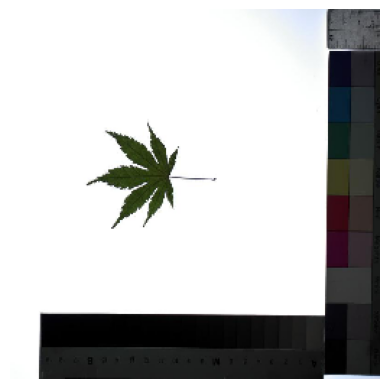

In [21]:
"""Sample Image"""
plt.axis('off')
plt.imshow(train_data.next()[0][0])

Below are more of sample lab images to know how different leaves look.

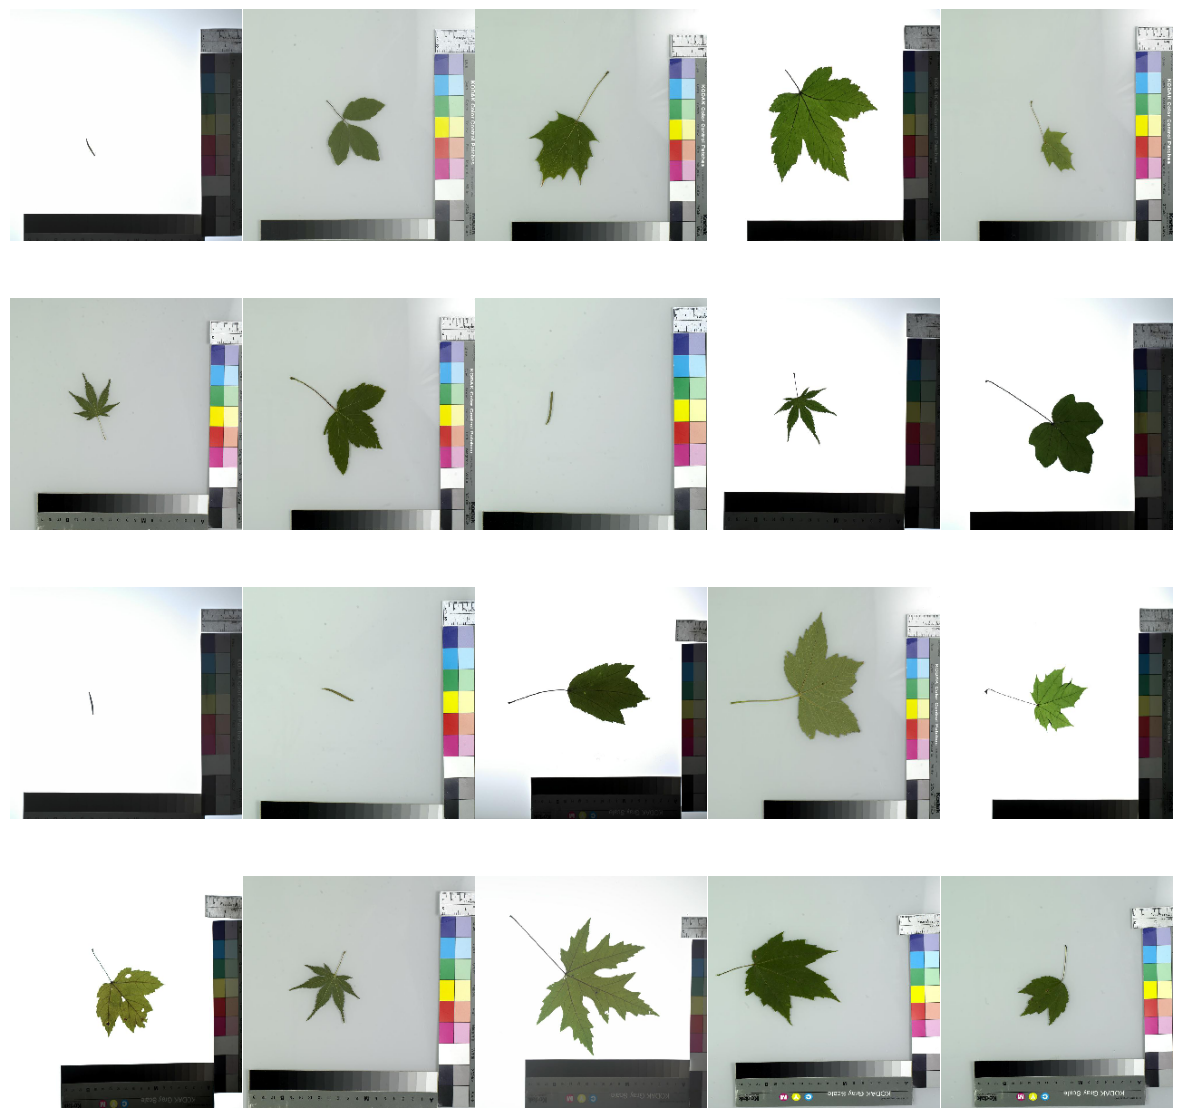

In [22]:
"""More sample images"""
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(train_data.next()[0][0])
plt.subplots_adjust(wspace=0.005, hspace=0.005)

## Exploratory Data Analysis

   Analysing the number of lab images available in each species to work further on creation of CNN

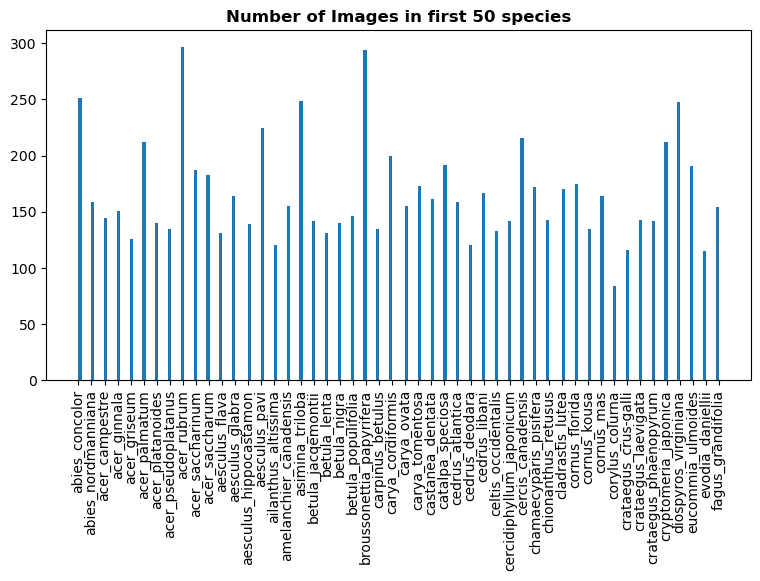

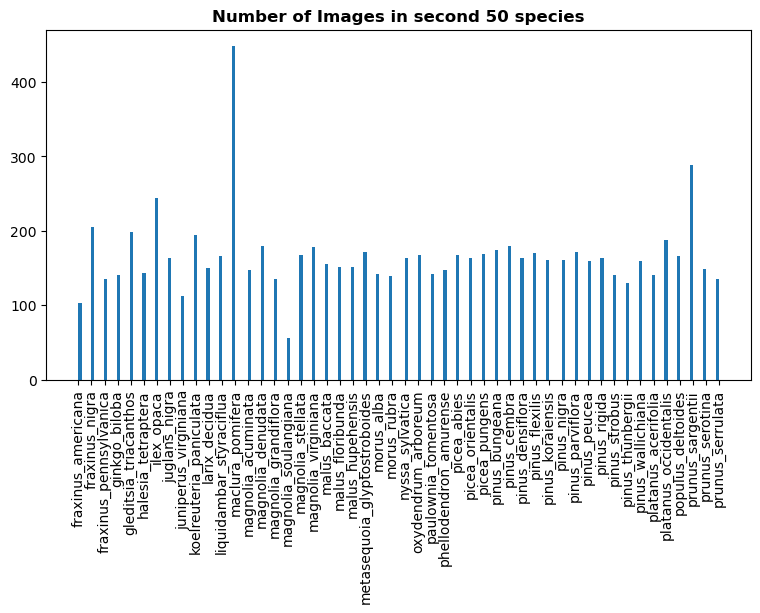

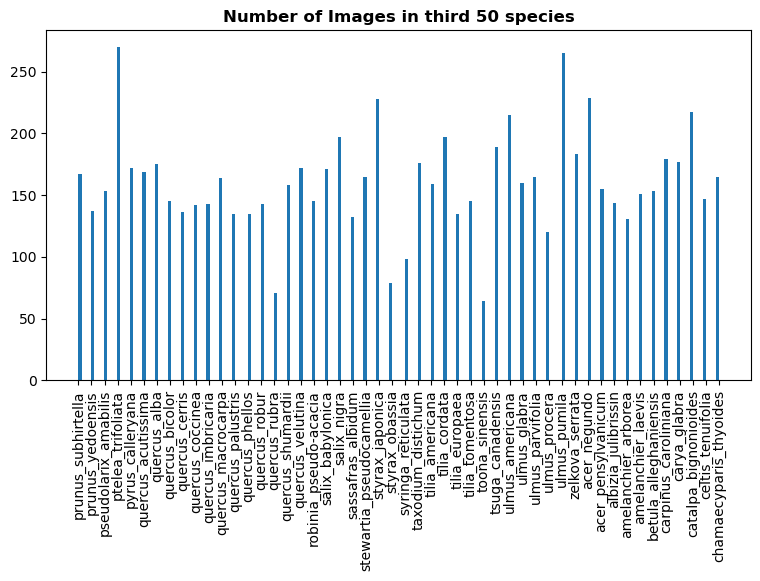

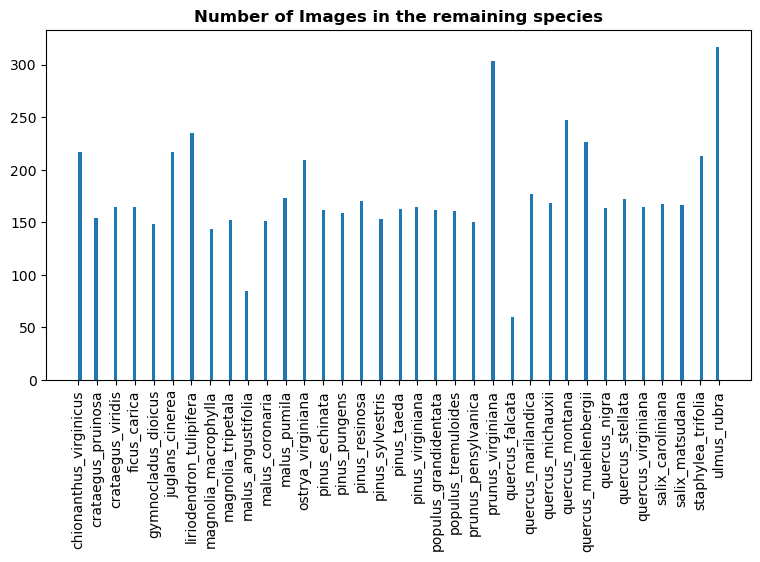

In [23]:
"""Analysing with the histogram of number of images in each species"""
df = pd.read_csv('LeafSpan\leafsnap-dataset\leafsnap-dataset.txt', sep='\t')
df.drop(['file_id', 'image_path', 'segmented_path'], axis=1)[df.source == 'lab']

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[:50])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.title("Number of Images in first 50 species", fontweight='bold')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
plt.title("Number of Images in second 50 species", fontweight='bold')
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[50:100])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
plt.title("Number of Images in third 50 species", fontweight='bold')
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[100:150])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,4)
plt.title("Number of Images in the remaining species", fontweight='bold')
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[150:])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.show()

It is understood from histograms that a species typically has around 150-200 images for training which is quite less on constructing a CNN hence we will follow an approach of trying to increase accuracy from the baseline model performance.

## Creating the CNN

For this initial model, we are defining 4 convolutional layers. Each convolutional layer generates a defined set of feature maps activated by activation function 'ReLU', followed a pooling process called MaxPooling(taking maximum of pixel values of a n*n matrix subset of the input matrix) that are fed into next convolutional layer.
Stride value in max pooling indicates the number of steps to be taken left or down in the matrix of pixels.
Activation function 'ReLU' is defined to increase non-linearity in the model and make the model learn faster. A neural network with number of layers starts with Sequential() which tell that there will be layers added to it.
<center>
    <img src="relu.png" width=500 height=500 />
</center>
<br>
<center>
    Fig. ReLU activation function
</center>
<br>
<center>
    <img src="max-pool.png" width=500 height=500 />
</center>
<br>
<center>
    Fig. MaxPooling process
</center>
<br>
CNN description:<br>

Convolutional Layer 1: 10 feature maps, takes input image of size (256,256,3)<br>

Convolutional Layer 2: 512 feature maps, takes input that is pooled output of first convolutional layer<br>

Convolutional Layer 3: 256 feature maps, takes input that is pooled output of second convolutional layer<br>

Convolutional Layer 4: 128 feature maps, takes input that is pooled output of third convolutional layer<br>

Flatten Layer 5: To convert the values of the convolution layers in the form of a vector.<br>

Dropout Layer 6: It is added to reduce the over fitting of the model to training images.It means we eliminate 25% of the values randomly<br>

Dense Layer or Fully connected Layer 7: Takes the vector of values, with again the activation function ReLU and an L2 regularization to reduce the complexity or overfitting of the model.<br>

Dropout Layer 6: It is added to reduce the over fitting of the model to training images. It means we eliminate 20% of the values randomly again.<br>

Dense Layer or Fully connected Layer 7: Takes the vector of values, with again the activation function ReLU and an L2 regularization of alpha 0.01, to reduce the complexity or overfitting of the model.<br>

Dense Layer or Fully connected Layer 7: Takes the vector of values from previous layer, with the activation function 'softmax', to create ouputs in the form of probabilities of each class or species.<br>

In [24]:
"""Defining the convolutional neural network"""
# Sequential model
network = models.Sequential()

# First Convolutional layer with (3,3) matrix size, same padding refers to add additional columns or rows to align
# with the filter and a maxpooling layers which takes maximum value in the (3,3) pixel value matrix.
network.add(layers.Conv2D(10,(3,3), padding='same', activation='relu', input_shape = (256,256,3)))
network.add(layers.MaxPool2D((3,3)))

# Second convolutional layer same as above but this one produces 512 feature maps unlike 10 above.
network.add(layers.Conv2D(512,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Third convolutional layer same as above but this one produces 256 feature maps unlike 512 above.
network.add(layers.Conv2D(256,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Fourth convolutional layer same as above but this one produces 128 feature maps unlike 256 above.
network.add(layers.Conv2D(128,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Flatten layer
network.add(layers.Flatten())

# Dropout layer of 25%
network.add(layers.Dropout(0.25))

# Dense layer of 512 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Dropout layer of 20% 
network.add(layers.Dropout(0.2))

# Dense Layer of 512 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Final Dense Layer with number of neurons same as number of classes of classification and 'softmax' as the 
# activation function
# softmax is useful because it converts the output layer into what is essentially a probability distribution.
network.add(layers.Dense(10, activation='softmax'))

## Compiling the model

ADAM optimizer and categorical cross entropy loss function is used during for compiling because 'ADAM' works well in adapting a learning for the CNN and to view training and validation accuracy for each training epoch, we pass the metrics argument. Our goal is to minimize the loss which increses accuracy.

In [25]:
"""Compiling the network"""
# The network has to be compiled before using it for fitting the data.
network.compile(optimizer='adam', 
                loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Model summary

In [26]:
"""A summary of layers in the neural network"""
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 512)       46592     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 256)         0

## Training the model

In [27]:
"""Fitting the model"""
# the number of steps in each training process or epoch. It is determined by remainder of train_data divided by
# batch size and the same for validation steps
train_steps = train_data.n//train_data.batch_size
val_steps = validation_data.n//validation_data.batch_size
# epochs define the number of times to go through the entire training data.
epochs = 10
train_results = network.fit(train_data, 
                            steps_per_epoch=train_steps, 
                            epochs=epochs,
                            validation_data=validation_data,
                            validation_steps=val_steps)

Epoch 1/10


c:\Users\Micah\anaconda3\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




13/13 [==============================] - 408s 29s/step - loss: 11.8931 - accuracy: 0.1294 - val_loss: 9.2261 - val_accuracy: 0.1875
Epoch 2/10
13/13 [==============================] - 277s 21s/step - loss: 7.5086 - accuracy: 0.1729 - val_loss: 5.5477 - val_accuracy: 0.3958
Epoch 3/10
13/13 [==============================] - 276s 21s/step - loss: 4.2373 - accuracy: 0.5079 - val_loss: 3.0410 - val_accuracy: 0.6979
Epoch 4/10
13/13 [==============================] - 267s 21s/step - loss: 2.5093 - accuracy: 0.7412 - val_loss: 1.9413 - val_accuracy: 0.8073
Epoch 5/10
13/13 [==============================] - 268s 21s/step - loss: 1.8496 - accuracy: 0.7823 - val_loss: 1.6007 - val_accuracy: 0.8333
Epoch 6/10
13/13 [==============================] - 250s 19s/step - loss: 1.4203 - accuracy: 0.8331 - val_loss: 1.2171 - val_accuracy: 0.8542
Epoch 7/10
13/13 [==============================] - 257s 20s/step - loss: 1.1384 - accuracy: 0.8888 - val_loss: 0.9908 - val_accuracy: 0.8906
Epoch 8/10
13/

## Visualizing the training results

In [18]:
def plot_train_results(train_results):
    """This function displays the training results"""
    acc = train_results.history['accuracy']
    val_acc = train_results.history['val_accuracy']

    loss = train_results.history['loss']
    val_loss = train_results.history['val_loss']
    """Using matplotlib to show results"""
    """Below code displays (Training and Validation Accuracy) Vs number of epochs"""

    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')
    """Below code displays (Training and Validation Loss) Vs number of epochs"""

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

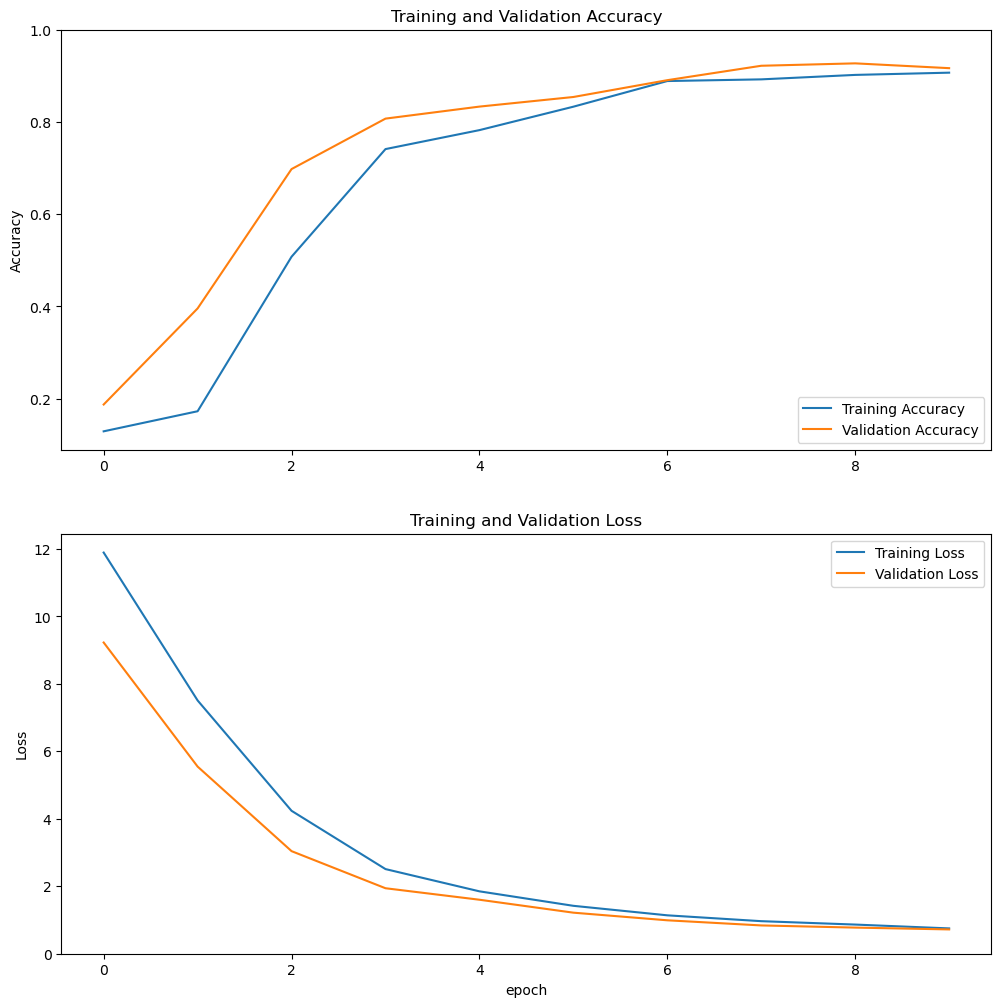

In [30]:
plot_train_results(train_results)

## Displaying test results

In [21]:
def test_results(model, testing_data):
    """ This function is to display the test results of the the CNN model
"""
    test_loss, test_acc = model.evaluate(testing_data, verbose=2)
    print('Test loss: {loss:.2f}'.format(loss=test_loss))
    print('Test accuracy: {acc:.2f}%'.format(acc=test_acc*100))
    return

In [32]:
test_results(network, test_data)

5/5 - 31s - loss: 0.7004 - accuracy: 0.9391 - 31s/epoch - 6s/step
Test loss: 0.70
Test accuracy: 93.91%


As it is seen from the plots, training accuracy and validation accuracy are quite good and the model has achieved only around 90% accuracy on the validation set and 93% on the test set. So, we will try to increase accuracy with image augmentation techniques 

## Second CNN model using field images

The second model is created to determine which type of images can be used for CNN. We would identify this based on accuracy measeure.

In [4]:
# This data frame consists of image names and the label that is required for 
# creating training images and testing images
"""Creating a dataframe to get the names of images and it's species"""
df = pd.read_csv('LeafSpan\leafsnap-dataset\leafsnap-dataset-images.txt', sep='\t')
df['image_name'] = df[df.source == 'field'].reset_index().image_path.str.split("/",expand=True)[4]
df = df[['image_name', 'species']]
df.head()

,image_name,species
0,12995307070714.jpg,Abies concolor
1,12995309747806.jpg,Abies concolor
2,12995309740463.jpg,Abies concolor
3,12995309748681.jpg,Abies concolor
4,12995309748490.jpg,Abies concolor


In [5]:
"""Dataframe that shows the image names and the label(species)"""
df_cut = df[df.species.isin(species[:10])]
train, test = train_test_split(df_cut, test_size = 0.2)
"""Displaying sample of training and test rows"""
print("sample training image names with labels of species\n")
print(train.head())
print("sample testing image names with labels of species\n")
print(test.head())

sample training image names with labels of species

               image_name           species
1537   12991999718211.jpg       Acer rubrum
437   1249580532_0003.jpg    Acer campestre
1114  1249061153_0000.jpg  Acer platanoides
1373   13001291073365.jpg       Acer rubrum
1661   13291686970575.jpg  Acer saccharinum
sample testing image names with labels of species

               image_name              species
109    13291732970222.jpg       Abies concolor
324   1259118878_0064.jpg   Abies nordmanniana
1205   13001277209985.jpg  Acer pseudoplatanus
549    13033299107802.jpg       Acer campestre
1702   13001326976457.jpg     Acer saccharinum


In [6]:
# data generator for training images
image_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# data generator for validation images
test_img_data = ImageDataGenerator(rescale=1./255)

In [8]:
"""Data generator that generates training, validation, testing images into target size"""
# Directory of Images
path = 'LeafSpan/leafsnap-dataset/dataset/images/field_images'

# Extracting images from the path and resizing them to (256,256) size. The same is done for training, valiation,
# testing images.
train_data = image_data.flow_from_dataframe(train,
                                           directory=path,
                                           x_col='image_name',
                                           y_col='species',
                                           class_mode='categorical',
                                           target_size=(256,256),
                                           color_mode='rgb',
                                           batch_size=64,
                                           shuffle=True,
                                           seed=3,
                                           interpolation='nearest',
                                            subset='training',
                                           validate_filenames=True)

validation_data = image_data.flow_from_dataframe(train,
                                           directory=path,
                                           x_col='image_name',
                                           y_col='species',
                                           class_mode='categorical',
                                           target_size=(256,256),
                                           color_mode='rgb',
                                           batch_size=64,
                                           shuffle=True,
                                           seed=3,
                                           interpolation='nearest',
                                                 subset='validation',
                                           validate_filenames=True)

test_data = test_img_data.flow_from_dataframe(test,
                                           directory=path,
                                           x_col='image_name',
                                           y_col='species',
                                           class_mode='categorical',
                                           target_size=(256,256),
                                           color_mode='rgb',
                                           batch_size=64,
                                           shuffle=True,
                                           seed=3,
                                           interpolation='nearest',
                                           validate_filenames=True)

Found 1153 validated image filenames belonging to 10 classes.
Found 288 validated image filenames belonging to 10 classes.
Found 361 validated image filenames belonging to 10 classes.


In [9]:
"""Displaying sample of data generated by ImageDataGenerator"""
print("Sample data for an image: \n", train_data.next()[0][0])
print("\nImages by data generator shape: ", train_data.next()[0].shape)

Sample data for an image: 
 [[[0.5294118  0.6666667  0.6431373 ]
  [0.54509807 0.67058825 0.6509804 ]
  [0.54509807 0.67058825 0.6509804 ]
  ...
  [0.46274513 0.5647059  0.5686275 ]
  [0.45098042 0.5647059  0.5568628 ]
  [0.43529415 0.5568628  0.5372549 ]]

 [[0.54509807 0.67058825 0.6509804 ]
  [0.54901963 0.6745098  0.654902  ]
  [0.5568628  0.6784314  0.65882355]
  ...
  [0.47058827 0.57254905 0.5686275 ]
  [0.454902   0.5686275  0.56078434]
  [0.44705886 0.56078434 0.54509807]]

 [[0.5411765  0.6627451  0.6431373 ]
  [0.54901963 0.67058825 0.6509804 ]
  [0.5529412  0.6666667  0.6509804 ]
  ...
  [0.4784314  0.57254905 0.57254905]
  [0.47058827 0.57254905 0.56078434]
  [0.45882356 0.56078434 0.54901963]]

 ...

 [[0.43921572 0.48627454 0.43921572]
  [0.44705886 0.48627454 0.4431373 ]
  [0.45882356 0.4901961  0.44705886]
  ...
  [0.30980393 0.31764707 0.23529413]
  [0.29411766 0.30980393 0.2509804 ]
  [0.2784314  0.3019608  0.25490198]]

 [[0.43529415 0.48235297 0.43529415]
  [0.4392

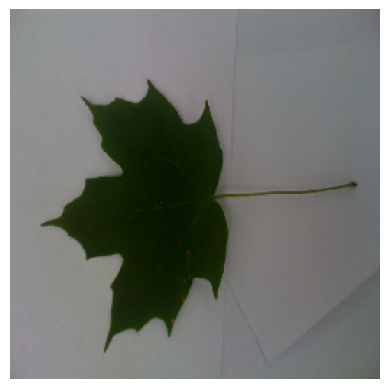

In [10]:
"""Sample Image"""
plt.axis('off')
plt.imshow(train_data.next()[0][0])

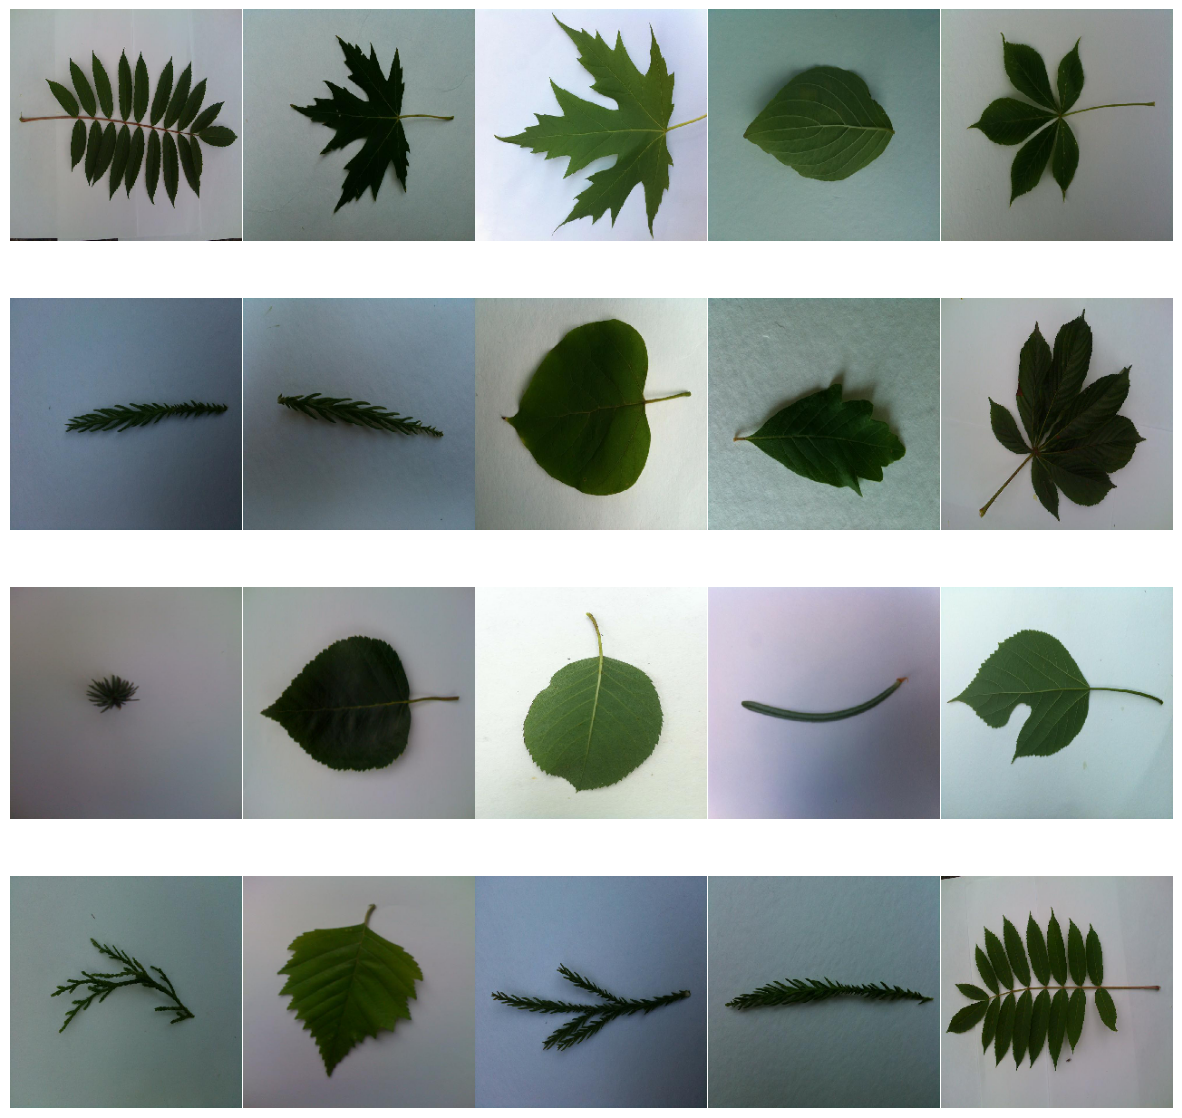

In [11]:
"""More sample images"""
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.axis('off')
    plt.imshow(train_data.next()[0][0])
plt.subplots_adjust(wspace=0.005, hspace=0.005)

## Exploratory Data Analysis

This analysis revealed number of images in each species and it is understood that the average number of images per species is similar to lab images. 

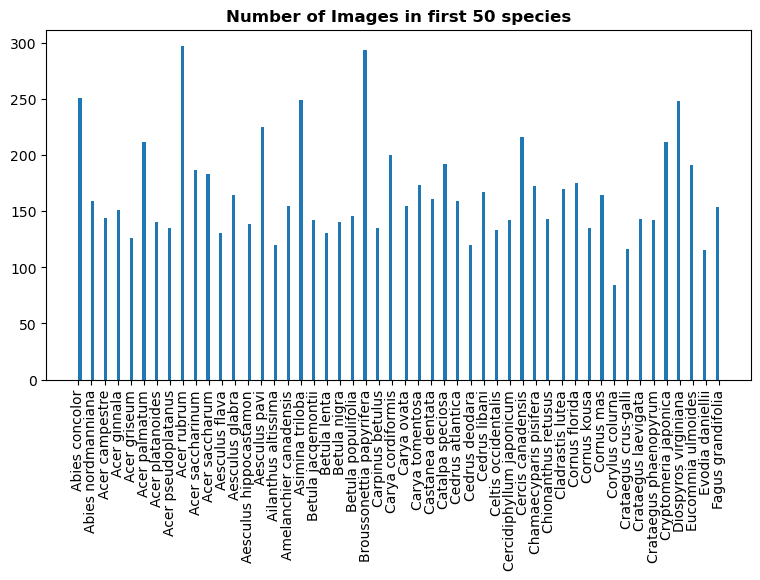

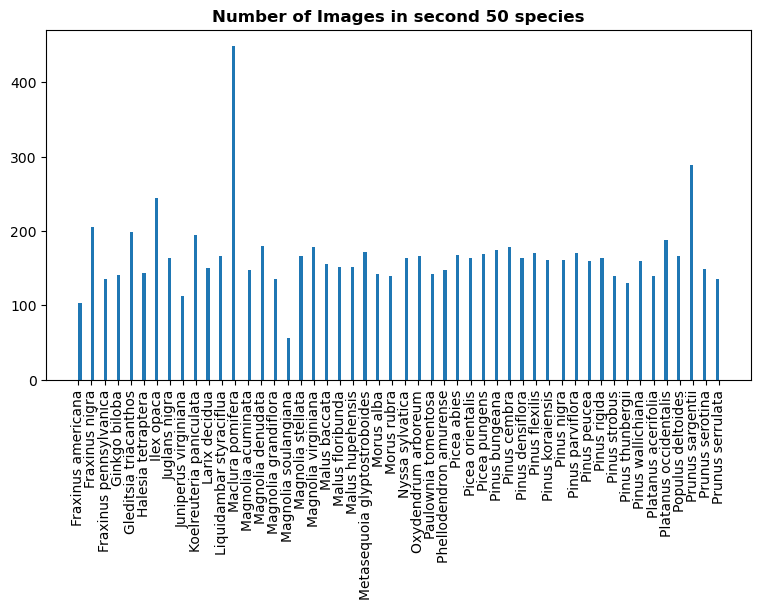

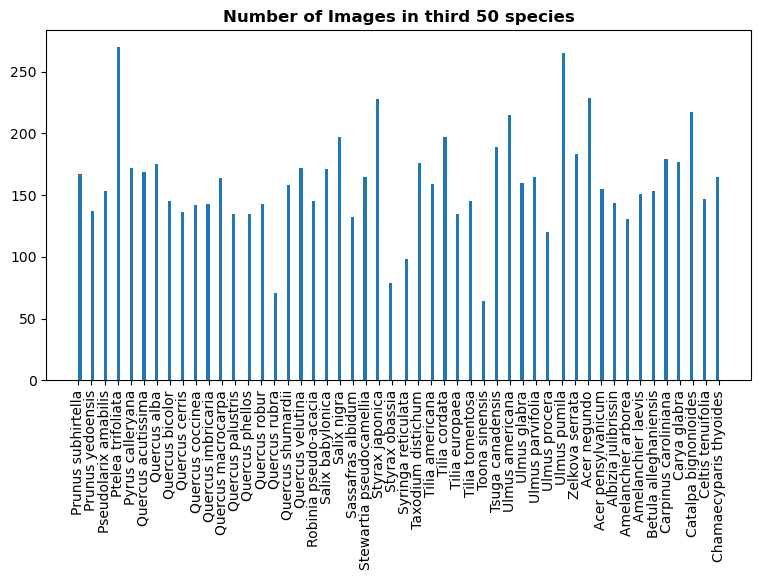

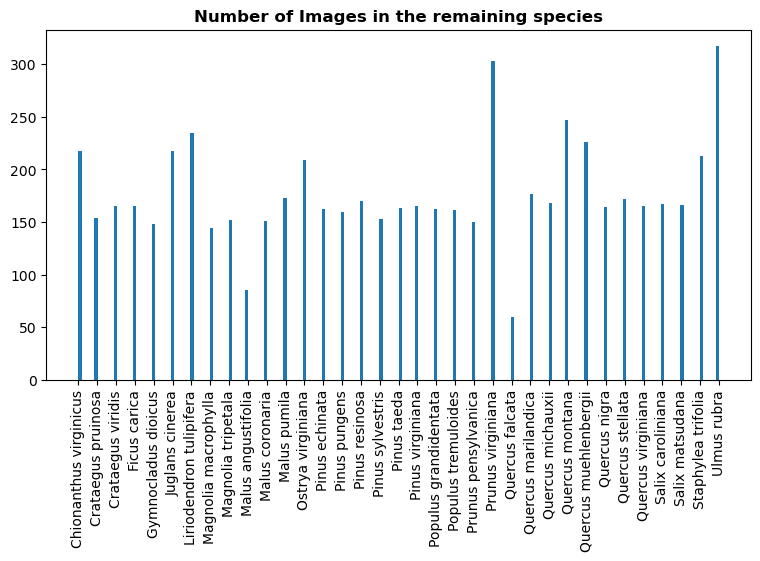

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[:50])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.title("Number of Images in first 50 species", fontweight='bold')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
plt.title("Number of Images in second 50 species", fontweight='bold')
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[50:100])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
plt.title("Number of Images in third 50 species", fontweight='bold')
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[100:150])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,4)
plt.title("Number of Images in the remaining species", fontweight='bold')
plt.hist(np.array(df.species[df.species.isin(df.species.unique()[150:])]), bins=200, histtype='barstacked')
plt.xticks(rotation='vertical')
plt.show()

## Defining the CNN for second model

The second model architecture is similar to above, and only an extra layer of Convolution is added and this shouldn't have any effect on accuracy.

In [13]:
"""Defining the convolutional neural network"""
# Sequential model
network = models.Sequential()

# First Convolutional layer with (3,3) matrix size, same padding refers to add additional columns or rows to align
# with the filter and a maxpooling layers which takes maximum value in the (3,3) pixel value matrix.
network.add(layers.Conv2D(10,(3,3), padding='same', activation='relu', input_shape = (256,256,3)))
network.add(layers.MaxPool2D((3,3)))

# Second convolutional layer same as above but this one produces 512 feature maps unlike 10 above.
network.add(layers.Conv2D(512,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Third convolutional layer same as above but this one produces 256 feature maps unlike 512 above.
network.add(layers.Conv2D(256,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Fourth convolutional layer same as above but this one produces 128 feature maps unlike 256 above.
network.add(layers.Conv2D(128,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Fifth convolutional layer same as above but this one produces 128 feature maps unlike 128 above.
network.add(layers.Conv2D(128,(3,3), padding='same', activation='relu'))
network.add(layers.MaxPool2D((3,3)))

# Flatten layer
network.add(layers.Flatten())

# Dropout layer of 25%
network.add(layers.Dropout(0.25))

# Dense layer of 512 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Dropout layer of 20% 
network.add(layers.Dropout(0.2))

# Dense Layer of 512 neurons with L2 regularization and ReLU activation function
network.add(layers.Dense(512, kernel_regularizer = regularizers.l2(0.01), activation='relu'))

# Final Dense Layer with number of neurons same as number of classes of classification and 'softmax' as the 
# activation function
# softmax is useful because it converts the output layer into what is essentially a probability distribution.
network.add(layers.Dense(10, activation='softmax'))

## Compiling the model

In [14]:
"""Compiling the network"""
# The network has to be compiled before using it for fitting the data.
network.compile(optimizer='adam', 
                loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Model Summary

In [15]:
"""A summary of layers in the neural network"""
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 10)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 512)       46592     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 512)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 256)         0

## Training the model

In [16]:
"""Fitting the model"""
# the number of steps in each training process or epoch. It is determined by remainder of train_data divided by
# batch size and the same for validation steps
train_steps = train_data.n//train_data.batch_size
val_steps = validation_data.n//validation_data.batch_size
# epochs define the number of times to go through the entire training data.
epochs = 10
train_results = network.fit(train_data, 
                            steps_per_epoch=train_steps, 
                            epochs=epochs,
                            validation_data=validation_data,
                            validation_steps=val_steps)

Epoch 1/10


c:\Users\Micah\anaconda3\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




18/18 [==============================] - 1043s 55s/step - loss: 7.7613 - accuracy: 0.1469 - val_loss: 6.1983 - val_accuracy: 0.1758
Epoch 2/10
18/18 [==============================] - 760s 43s/step - loss: 5.2884 - accuracy: 0.1579 - val_loss: 4.2987 - val_accuracy: 0.1406
Epoch 3/10
18/18 [==============================] - 703s 39s/step - loss: 3.8129 - accuracy: 0.1515 - val_loss: 3.3810 - val_accuracy: 0.1602
Epoch 4/10
18/18 [==============================] - 729s 39s/step - loss: 3.1134 - accuracy: 0.1641 - val_loss: 2.8627 - val_accuracy: 0.1602
Epoch 5/10
18/18 [==============================] - 660s 37s/step - loss: 2.7190 - accuracy: 0.1837 - val_loss: 2.5219 - val_accuracy: 0.1680
Epoch 6/10
18/18 [==============================] - 654s 36s/step - loss: 2.5083 - accuracy: 0.1892 - val_loss: 2.4065 - val_accuracy: 0.1875
Epoch 7/10
18/18 [==============================] - 680s 38s/step - loss: 2.3398 - accuracy: 0.2049 - val_loss: 2.2046 - val_accuracy: 0.2266
Epoch 8/10
18/

## Visualizing the training results

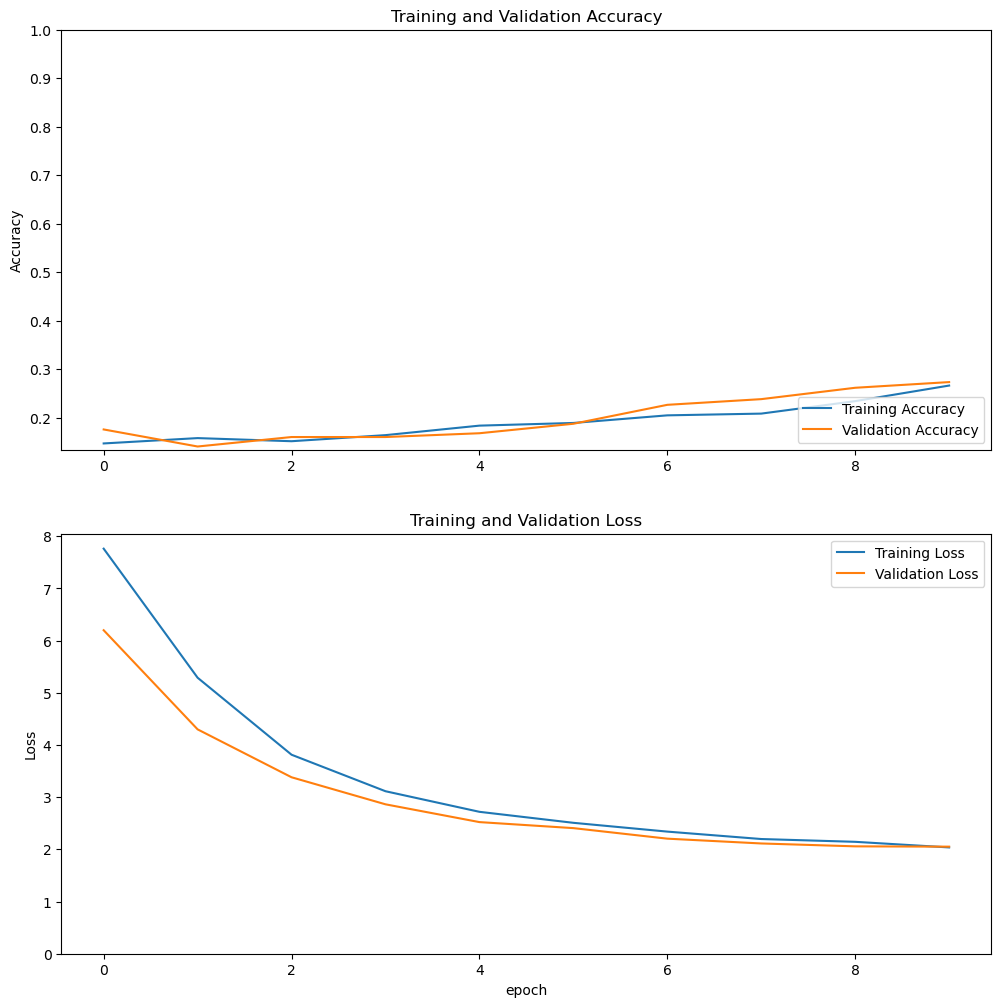

In [19]:
plot_train_results(train_results)

## Printing test results

In [22]:
test_results(network, test_data)

6/6 - 90s - loss: 2.0550 - accuracy: 0.2355 - 90s/epoch - 15s/step
Test loss: 2.05
Test accuracy: 23.55%


The interpretation is that lab images are far better for CNN learning than that of the field images as the accuracy of lab images is far better than field images

## Third CNN Model using Image augmentation

Now that the model with lab images has acheived around 70% accuracy, we will try checking with 50 species which is a bit more ambitious with our CNN network. we will also try adding layers to CNN and validate the model performance

### Obtaining dataset of images with species and image names

In [20]:
# This data frame consists of image names and the label that is required for 
# creating training images and testing images
df = pd.read_csv('images.txt', sep='\t')
df['image_name'] = df[df.source == 'lab'].drop(['file_id','source','segmented_path'], 
                                               axis=1)['image_path'].str[-15:]
df = df[df.source == 'lab'][['image_name', 'species']]
species = df.species.unique()
df[['image_name', 'species']]

,image_name,species
0,ny1157-01-1.jpg,Abies concolor
1,ny1157-01-2.jpg,Abies concolor
2,ny1157-01-3.jpg,Abies concolor
3,ny1157-01-4.jpg,Abies concolor
4,ny1157-02-1.jpg,Abies concolor
...,...,...
30812,wb1219-09-4.jpg,Ulmus rubra
30813,wb1219-10-1.jpg,Ulmus rubra
30814,wb1219-10-2.jpg,Ulmus rubra
30815,wb1219-10-3.jpg,Ulmus rubra


### Dividing into training and testing dataset of images

In [21]:
"""Dataframe that shows the image names and the label(species)"""

df_cut = df[df.species.isin(species[:50])]
train, test = train_test_split(df_cut, test_size = 0.2)
print("sample training Image names with labels of species\n")
print(train.head())
print("sample testing Image names with labels of species\n")
print(test.head())

sample training Image names with labels of species

           image_name                   species
753   ny1011-03-1.jpg              Acer griseum
4375  wb1076-05-4.jpg               Carya ovata
5642  ny1038-01-4.jpg  Cercidiphyllum japonicum
4796  wb1414-09-1.jpg          Castanea dentata
5131  ny1138-07-4.jpg          Cedrus atlantica
sample testing Image names with labels of species

           image_name           species
3372  wb1194-03-4.jpg      Betula lenta
5245  ny1147-03-2.jpg    Cedrus deodara
5422  ny1061-07-3.jpg     Cedrus libani
1088  wb1565-07-2.jpg  Acer platanoides
4470  wb1078-09-3.jpg       Carya ovata


### Applying image augmentation

Here we apply image augmentation of adding brightness with range (1,1.5) and zooming images by 2x.

In [22]:
# data generator for training images
image_data = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                zoom_range=2, brightness_range=(1,1.5))
# data generator for validation images
test_img_data = ImageDataGenerator(rescale=1./255)

### Obtaining training, validation, testing images data to be fed into CNN

### Sample images after image augmentation

## Defining the CNN for third model

## Compiling the model

Compiling the model with same optimise and loss function as they are proved to imprve CNN's performance.

## Training the model

## Visualizing the training results

## Displaying the test results

## Interpretation of results


## Fourth CNN Model using the VGGNet architecture

### Loading the images from the local directory

In [24]:
# This data frame consists of image names and the label that is required for 
# creating training images and testing images
df = pd.read_csv('images.txt', sep='\t')
df['image_name'] = df[df.source == 'lab'].drop(['file_id','source','segmented_path'], axis=1)['image_path'].str[-15:]
df = df[df.source == 'lab'][['image_name', 'species']]
species = df.species.unique()
# firstly we start with classifying 10 species.
species[:10]

array(['Abies concolor', 'Abies nordmanniana', 'Acer campestre',
       'Acer ginnala', 'Acer griseum', 'Acer palmatum',
       'Acer platanoides', 'Acer pseudoplatanus', 'Acer rubrum',
       'Acer saccharinum'], dtype=object)

### Splitting into testing and training datasets

In [25]:
"""Dataframe that shows the image names and the label(species)"""
df_cut = df[df.species.isin(species[:10])]
train, test = train_test_split(df_cut, test_size = 0.2)
print("sample training Image names with labels of species\n")
print(train.head())
print("sample testing Image names with labels of species\n")
print(test.head())

sample training Image names with labels of species

           image_name         species
39    ny1157-10-4.jpg  Abies concolor
1453  pi2610-04-4.jpg     Acer rubrum
1471  pi2610-09-2.jpg     Acer rubrum
781   ny1011-10-1.jpg    Acer griseum
416   ny1079-02-3.jpg  Acer campestre
sample testing Image names with labels of species

           image_name           species
1566  pi2773-10-1.jpg       Acer rubrum
2     ny1157-01-3.jpg    Abies concolor
197   ny1179-10-2.jpg    Abies concolor
1425  pi2609-07-4.jpg       Acer rubrum
1666  pi0172-09-4.jpg  Acer saccharinum


The Images are loaded using ImageDataGenerator() and the same can be used for augmenting images. Here use rescale the pixel vlaues to range between 0 and 1 as it is quicker in computation.

Using ImageDataGenerator to produce a data of images without image augmentation as it is proved that image augmentation didn't help in our case

In [26]:
# data generator for training images
image_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# data generator for validation images
test_img_data = ImageDataGenerator(rescale=1./255)

## Using VGGNet architechture as a convolutional base 

## Summary of VGGNet architecture

## Compiling the model

ADAM optimizer and categorical cross entropy loss function is used during for compiling because 'ADAM' works well in adapting a learning for the CNN and to view training and validation accuracy for each training epoch, we pass the metrics argument. Our goal is to minimize the loss which increses accuracy.

## Summary of the model

## Training the model

## Visualizing the model

## Displaying the test results

## Interpretation of Results


## Conclusion

1. It is understood that initially the CNN worked very good for lab images without image augmentation and 4 layers of convolution with more generation of feature maps in each layer.
2. Secondly, the model is tested with field real-like images caused the CNN to not work well, but with number of species made less for classfication, the model works better for lab images.
3. Final approach is to use of image augmentation and the popular convolutional base VGGNET for improving accuracy (IN PROGRESS).
4. The final suggestion of improvement is to use the CNN for training all species of images and generate the probabilities of classification of an image and generate the label or species with the highest probability.
5. It is suggested to use a CNN with 10 species classification out of 185 here, for training wholeset of images 10 species at a time and create a probability distribution and finally labelling the one with highest probability.

# Author
    Professor AKO, R. E (DR)
    Dept of Computer Science
    Federal University of Petroleum Resources Effurun

# Co-Author
    Faithful Adeda
    Dept of Computer Science
    University of the People, CA

# Citation

**References:**<br>
1. "Leafsnap: A Computer Vision System for Automatic Plant Species Identification," Neeraj Kumar, Peter N. Belhumeur, Arijit Biswas, David W. Jacobs, W. John Kress, Ida C. Lopez, João V. B. Soares, Proceedings of the 12th European Conference on Computer Vision (ECCV), October 2012
2. ADL (24 April 2018), "*An intuitive guide to Convolutional Neural Networks*" retrieved from https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/
3. TensorFlow Tutorials,"*Convolutional Neural Network (CNN)*" retrieved from https://www.tensorflow.org/tutorials/images/cnn
10844923-what-is-a-neural-network
1. TensorFlow Core Documentation, "*Module: tf.keras*" retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/